# H7 implement kmeans algorithm
## student ID:
## student Name:

In [137]:
import numpy as np
from IPython.display import clear_output
import os
import matplotlib.pyplot as plt

[10.65419935  2.18648104]


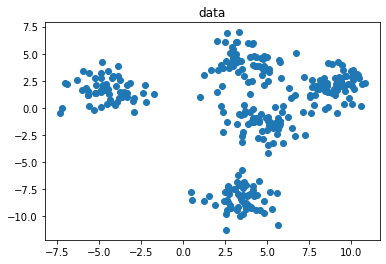

In [138]:
X = np.load("X.npy")

plt.figure()
plt.scatter(X[0],X[1])
plt.title("data")

plt.savefig("data.png")
print(X[:,1])

In [139]:
x_idxs = np.random.permutation(X.shape[1])
u = X[:, x_idxs[:8]]
print(u)

[[ 8.6234221  -4.0568142   6.69335122 10.03175703  2.629891    3.37882957
   7.56599373  8.38513972]
 [ 4.15090226  0.2530004  -2.53515786  2.82142259 -1.33370632 -9.97597151
   1.17293408  2.75272925]]


In [140]:
def improvedUkSelect(X,K):
    n = len(X[0])
    fisrt = np.random.randint(n)
    data =[]
    data.append(fisrt)
    dist_note =[1000000]*n

    for k_i in range(1,K):
        for i in range(n):
            center = [sum([X[0,id] for id in data])/(k_i),sum([X[1,id] for id in data])/(k_i)]
            dist = distance(center,X[:,i])
            if dist<dist_note[i]:
                dist_note[i]=dist
        next = np.argmax(dist_note)
        data.append(next)
    return np.array([X[:,id] for id in data]).reshape(2,-1)
    
print(improvedUkSelect(X,8))

[[ 4.59320342 -9.42934804 -4.84206467  4.25768059 10.42227059  3.06625087
  -7.0625674   2.33663023]
 [-7.0625674   2.33663023 10.80694224  2.25919685 10.80694224  2.25919685
  10.80694224  2.25919685]]


In [155]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

def kmeans(X, K=8, max_iterations=100,is_improve=False):
    if not os.path.exists("kmeans-k{}".format(K)):
        os.mkdir("kmeans-k{}".format(K))
    plt.figure()
    
    # 
    # step 1 init cluster centers
   
    if is_improve:
        u = improvedUkSelect(X,K)
    else:
        x_idxs = np.random.permutation(X.shape[1])
        u = X[:, x_idxs[:K]]
    print(u)
    # init all samples x into first cluster
    y = np.zeros((X.shape[1],))

    for iter_idx in range(1, max_iterations+1):
        
        # D_ik denotes the distance between x_i and u_k
        D = np.zeros((X.shape[1], K))
        for i in range(X.shape[1]):
            
            ####### start Your code here ########
            #####################################
            # step 2
            for k in range(K):
                # rewrite the following line to calculate the distance between x_i and u_k
                
                # then store d_ik into D

                D[i][k] = distance(X[:,i],u[:,k])
            
            
            # rewrite the following line to classify the 𝑥_𝑖 to its nearest cluster c_𝑘 
            # y^{i} = argmin_{k}{d_{ik} | k = 1,2,...K}
            # remeber that the i-th line of matrix D is the distances of x^{i} to each cluster center
            y[i] = np.argmin(D[i])
            
            ####### end Your code  ############
            ###################################
        
        # step 3

        for k in range(K):
            ####### start Your code here ########
            #####################################
            sum =np.zeros(shape=(1,2))
            cnt=0
            for i in range(y.shape[0]):
                if y[i]==k:
                    sum+=X[:,i]
                    cnt+=1
            if cnt ==0:continue
            u[:,k]=[sum[0][0]/cnt,sum[0][1]/cnt]

            # Calculate the mean of the samples 𝑥 \in 𝑐_𝑘 as new 𝜇_𝑘 
            # remeber that the cluster information of x are stored in y 

            #u[:,k] =  u[:,k]
            ####### end Your code  ############
            ###################################
        
       # plot figures
            clear_output(wait=True)
            plt.scatter(X[0,:],X[1,:], c=y, s=8)
            plt.title("kmeans clustering at iter={}".format(iter_idx))
            
            #plot cluster centers
            plt.scatter(u[0,:],u[1,:], c=range(K), s=K, marker='o', linewidths=6)
            for k in range(K):
                plt.text(u[0,k], u[1,k], "u_{}".format(k),)
            
            plt.savefig("kmeans-k{}/iter={}.png".format(K, iter_idx))
            plt.show()
        
    return y

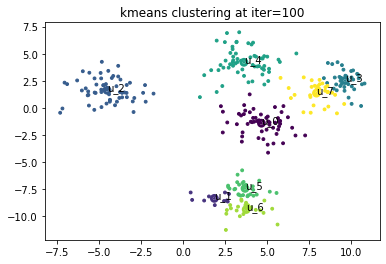

In [153]:
y = kmeans(X, K=8, max_iterations=100)


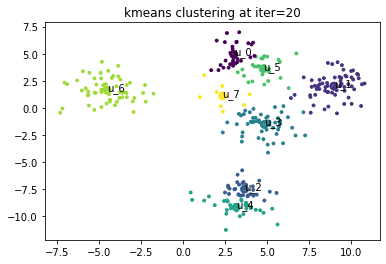

In [154]:
y = kmeans(X, K=8, max_iterations=20)

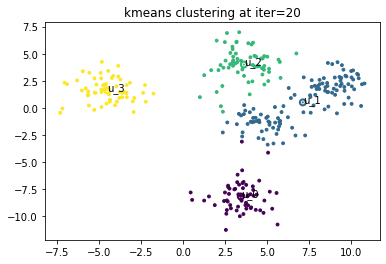

In [157]:
y = kmeans(X, K=4, max_iterations=20,is_improve=True)

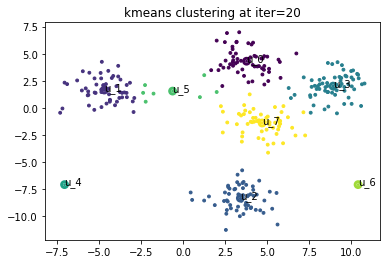

In [158]:
y = kmeans(X, K=8, max_iterations=20,is_improve=True)